In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn import preprocessing 

In [3]:
client = pd.read_csv("C:/Users/H P/Desktop/ANACONDA/LOGISTIC REGRESSION/ASSIGNMENT/bank-full.csv"
                     ,sep=';')
client

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [4]:
client.head(10)
client.isnull().sum()
client.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


<AxesSubplot:xlabel='job', ylabel='duration'>

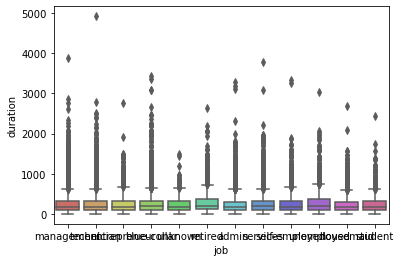

In [5]:
sns.boxplot(x='job',y='duration',data=client,palette='hls')

<AxesSubplot:xlabel='marital', ylabel='count'>

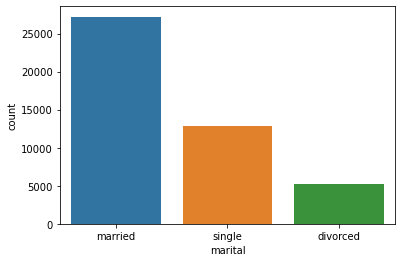

In [6]:
sns.countplot(x='marital',data=client)

In [7]:
from sklearn.linear_model import LogisticRegression
client.shape

(45211, 17)

In [8]:
client.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [9]:
X = client.iloc[:,[0,5,9,11,12,13]]
X

,age,balance,day,duration,campaign,pdays
0,58,2143,5,261,1,-1
1,44,29,5,151,1,-1
2,33,2,5,76,1,-1
3,47,1506,5,92,1,-1
4,33,1,5,198,1,-1
...,...,...,...,...,...,...
45206,51,825,17,977,3,-1
45207,71,1729,17,456,2,-1
45208,72,5715,17,1127,5,184
45209,57,668,17,508,4,-1


In [10]:
label_encoder = preprocessing.LabelEncoder()
client['y']= label_encoder.fit_transform(client['y']) 

In [11]:
Y = client.iloc[:,16]
Y

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: int32

In [12]:
classifier = LogisticRegression()
classifier.fit(X,Y)

C:\Users\H P\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [13]:
classifier.coef_

array([[ 8.74887013e-03,  3.62498463e-05, -4.25280754e-03,
         3.63824758e-03, -1.12168698e-01,  3.10052033e-03]])

In [14]:
classifier.predict_proba(X)

array([[0.88715801, 0.11284199],
       [0.9347076 , 0.0652924 ],
       [0.95397458, 0.04602542],
       ...,
       [0.1955183 , 0.8044817 ],
       [0.83384752, 0.16615248],
       [0.80676499, 0.19323501]])

In [15]:
y_pred = classifier.predict(X)
client["y_pred"] = y_pred
client  

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,y_pred
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,1,1
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,1,0
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,1,1
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,0,0


In [16]:
y_prob = pd.DataFrame(classifier.predict_proba(X.iloc[:,:]))
new_df = pd.concat([client,y_prob],axis=1)
new_df 

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,y_pred,0,1
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0,0,0.887158,0.112842
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0,0,0.934708,0.065292
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0,0,0.953975,0.046025
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0,0,0.942472,0.057528
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0,0,0.930060,0.069940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,1,1,0.460443,0.539557
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,1,0,0.804876,0.195124
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,1,1,0.195518,0.804482
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,0,0,0.833848,0.166152


In [17]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y,y_pred)
print (confusion_matrix)

[[39305   617]
 [ 4347   942]]


In [18]:
pd.crosstab(y_pred,Y) 

y,0,1
row_0,,
0,39305,4347
1,617,942


In [19]:
accuracy = sum(Y==y_pred)/client.shape[0]
accuracy

0.8902037114861427

In [20]:
from sklearn.metrics import classification_report 
print (classification_report (Y, y_pred)) 

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     39922
           1       0.60      0.18      0.28      5289

    accuracy                           0.89     45211
   macro avg       0.75      0.58      0.61     45211
weighted avg       0.87      0.89      0.86     45211



In [21]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
Logit_roc_score=roc_auc_score(Y,classifier.predict(X))
Logit_roc_score

0.581325182233546

In [22]:
y_prob1 = pd.DataFrame(classifier.predict_proba(X)[:,1]) 

In [23]:
y_prob1 

,0
0,0.112842
1,0.065292
2,0.046025
3,0.057528
4,0.069940
...,...
45206,0.539557
45207,0.195124
45208,0.804482
45209,0.166152
